In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm

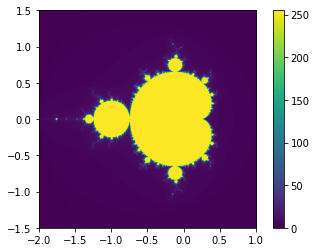

In [2]:
width, height = 800, 800
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
max_iter = 256

# Create an empty canvas
canvas = np.zeros((width, height))

# Generate the Mandelbrot set
for x in range(width):
    for y in range(height):
        zx, zy = x * (xmax - xmin) / (width - 1) + xmin, y * (ymax - ymin) / (height - 1) + ymin
        c = zx + zy * 1j
        z = c
        for i in range(max_iter):
            if abs(z) > 2.0:
                break 
            z = z * z + c
        # Set the pixel value based on the number of iterations
        canvas[y, x] = i

# Create a colored image of the Mandelbrot set
plt.imshow(canvas, extent=(xmin, xmax, ymin, ymax))
plt.colorbar()
plt.show()